## K-MEANS CLUSTER ANALYSIS
unsupervised classification
  * used for data reduction
  * group data based on high variance between groups and low variance within groups
  * creates p-dimensional space (p=number variables)
  * uses distance calculation (an example is Euclidean distance)
      * if k = 2
      * randomly selects two points as centriods and calculates shortest distance between another point. Nearest will belong to that centriod cluster. Calculate for all points
      * Calculate the means of all the points assigned to each cluster. The mean will be the new centriod.
      * Process is iterated till centriod doesn't change much based on location
  * user specify number of clusters (k) and takes the mean of all iterated centriods as the final centriod separating each cluster
  
  * Check out this excellent youtube video https://www.youtube.com/watch?v=rjm4slbER_M
  
#### Limitations
  * Need to specify number of clusters but you wouldn't know how many there are
  * Not recommended with a lot of categorical variables
  * Assumed clusters are distinct, spherical, and approximately equal in size
  
#### Steps to Verify
  * Run mutiple k
  * Split into test and training sets and test separately

In [37]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [38]:
# load iris dataset and dump into a dataframe
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [39]:
# more on the iris dataset
print iris['DESCR']

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [58]:
# Add target response into dataframe, i.e., species and convert them from codes into names
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df['speciesF'] = pd.DataFrame(iris.target)
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,speciesF
0,-0.900681,1.032057,-1.341272,-1.312977,setosa,0
1,-1.143017,-0.124958,-1.341272,-1.312977,setosa,0


In [49]:
df.columns[:-2]

Index([u'sepal length (cm)', u'sepal width (cm)', u'petal length (cm)',
       u'petal width (cm)'],
      dtype='object')

In [50]:
# standardise the means to 0 and standard error to 1
for i in df.columns[:-2]: # df.columns[:-1] = dataframe for all features, minus target
    df[i] = preprocessing.scale(df[i].astype('float64'))

df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),speciesF
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,150.000000
mean,-2.775558e-16,-5.140333e-16,1.154632e-16,9.251859e-16,1.000000
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,0.819232
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00,0.000000
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00,0.000000
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01,1.000000
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01,2.000000
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00,2.000000


In [65]:
feature = df[df.columns[:-2]]
# no target is required for unsupervised classification
# target = df['PRICE']

train_feature, test_feature = train_test_split(feature, random_state=123, test_size=0.2)

print train_feature.shape
print test_feature.shape

(120, 4)
(30, 4)


In [52]:
# before anything, let's take a look at the kmeans model and the arguments available
KMeans(n_clusters=2)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [53]:
from scipy.spatial.distance import cdist
import numpy as np
clusters=range(1,10)
# to store average distance values for each cluster from 1-9
meandist=[]


# k-means cluster analysis for 9 clusters                                                           
for k in clusters:
    # prepare the model
    model=KMeans(n_clusters=k)
    # fit the model
    model.fit(train_feature)
    # test the model
    clusassign=model.predict(train_feature)
    # gives average distance values for each cluster solution
        # cdist calculates distance of each two points from centriod
        # get the min distance (where point is placed in clsuter)
        # get average distance by summing & dividing by total number of samples
    meandist.append(sum(np.min(cdist(train_feature, model.cluster_centers_, 'euclidean'), axis=1)) 
    / train_feature.shape[0])

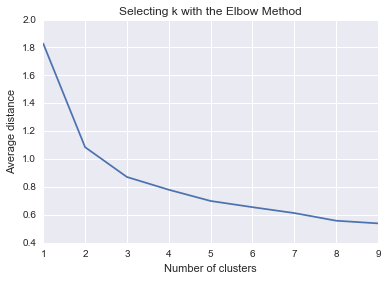

In [54]:
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
"""Plot average distance from observations from the cluster centroid
to use the Elbow Method to identify number of clusters to choose"""

plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')

# look a bend in the elbow that kind of shows where 
# the average distance value might be leveling off such that adding more clusters 
# doesn't decrease the average distance as much

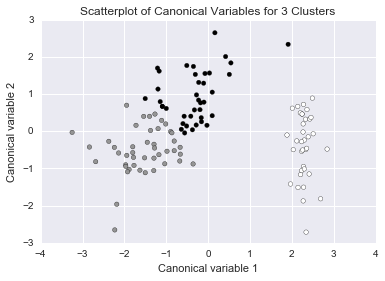

In [55]:
# Interpret 3 cluster solution
model3=KMeans(n_clusters=3)
model3.fit(train_feature)
clusassign=model3.predict(train_feature)
# plot clusters

# Use Canonical Discriminate Analysis to reduce the dimensions (into 2)
# Creates a smaller no. of variables, with canonical variables ordered by proportion of variable accounted
# i.e., 1st canonical variable is most importance & so on

from sklearn.decomposition import PCA
pca_2 = PCA(2) #return first two canonical variables
plot_columns = pca_2.fit_transform(train_feature)
# plot 1st canonical v in x axis, 2nd variable on y axis
# color code variables based on cluster assignments (i.e., predicted targets)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model3.labels_)
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 3 Clusters')
plt.show()

In [31]:
# compare means of each variable between clusters

"""
BEGIN multiple steps to merge cluster assignment with clustering variables to examine
cluster variable means by cluster
"""
# create a unique identifier variable from the index for the 
# cluster training data to merge with the cluster assignment variable
train_feature.reset_index(level=0, inplace=True)
# create a list that has the new index variable
cluslist=list(train_feature['index'])
# create a list of cluster assignments
labels=list(model3.labels_)
# combine index variable list with cluster assignment list into a dictionary
newlist=dict(zip(cluslist, labels))
newlist
# convert newlist dictionary to a dataframe
newclus=pd.DataFrame.from_dict(newlist, orient='index')
newclus
# rename the cluster assignment column
newclus.columns = ['cluster']


# now do the same for the cluster assignment variable
# create a unique identifier variable from the index for the 
# cluster assignment dataframe 
# to merge with cluster training data
newclus.reset_index(level=0, inplace=True)
# merge the cluster assignment dataframe with the cluster training variable dataframe
# by the index variable
merged_train=pd.merge(train_feature, newclus, on='index')
merged_train.head(n=100)
# cluster frequencies
merged_train.cluster.value_counts()

"""
END multiple steps to merge cluster assignment with clustering variables to examine
cluster variable means by cluster
"""

# FINALLY calculate clustering variable means by cluster
clustergrp = merged_train.groupby('cluster').mean()
print ("Clustering variable means by cluster")
print(clustergrp)

Clustering variable means by cluster
              index  sepal length (cm)  sepal width (cm)  petal length (cm)  \
cluster                                                                       
0         84.948718          -0.189208         -0.991235           0.233470   
1         22.694444          -0.984826          0.948495          -1.300203   
2        107.622222           1.035312          0.019026           0.932092   

         petal width (cm)  
cluster                    
0                0.150081  
1               -1.239936  
2                0.948358  


In [64]:
# Examine between clusters

# validate clusters in training data by examining cluster differences in species using ANOVA
# first have to merge GPA with clustering variables and cluster assignment data 
target=df['speciesF']
# split GPA data into train and test sets
train_target, test_target = train_test_split(target, test_size=.2, random_state=123)
# convert train_target to a np array first then construct a dataframe
train_target1=pd.DataFrame(np.array(train_target),columns=['species'])
train_target1.reset_index(level=0, inplace=True)
merged_train_all=pd.merge(train_target1, merged_train, on='index')

sub1 = merged_train_all[['species', 'cluster']].dropna()
sub1.head(2)

,species,cluster
0,2,1
1,2,1


In [33]:
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi 

gpamod = smf.ols(formula='species ~ C(cluster)', data=sub1).fit()
print (gpamod.summary())


                            OLS Regression Results                            
Dep. Variable:                species   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                   0.06369
Date:                Fri, 21 Oct 2016   Prob (F-statistic):              0.938
Time:                        23:32:31   Log-Likelihood:                -116.63
No. Observations:                  97   AIC:                             239.3
Df Residuals:                      94   BIC:                             247.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept           0.9722      0.136     

In [35]:
print ('means for GPA by cluster')
m1= sub1.groupby('cluster').mean()
print (m1)

print ('standard deviations for GPA by cluster')
m2= sub1.groupby('cluster').std()
print (m2)

mc1 = multi.MultiComparison(sub1['species'], sub1['cluster'])
res1 = mc1.tukeyhsd()
print(res1.summary())

means for GPA by cluster
          species
cluster          
0        0.972222
1        1.027778
2        0.960000
standard deviations for GPA by cluster
          species
cluster          
0        0.774084
1        0.877858
2        0.789515
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  0      1     0.0556  -0.4036 0.5147 False 
  0      2    -0.0122  -0.5194 0.495  False 
  1      2    -0.0678   -0.575 0.4394 False 
--------------------------------------------
